Did you know?


**A person can be turned into a diamond!!**

Want to live on for eternity? With the advancement of lab-grown diamond technology, some companies are now offering to turn the ashes of a deceased love one into a diamond gem that can worn as jewelry by those they left behind. Swiss-based Algordanza has been providing memorial diamonds since 2003, and now operates in 30 different countries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from PIL import Image
sns.set(style="ticks", color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
diamond=pd.read_csv('diamonds.csv')
diamond.head(2)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


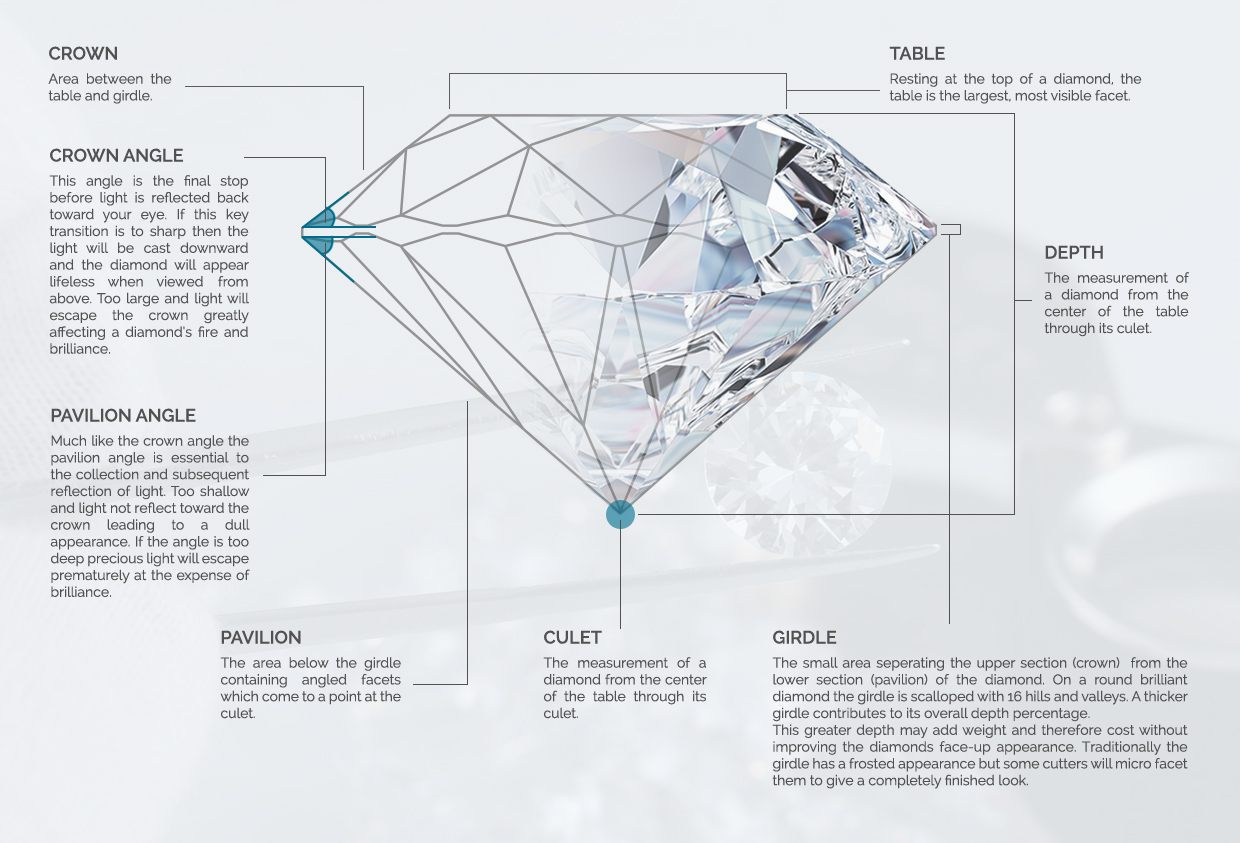

In [3]:
Image.open('Anglo-DiamondAnatomy_03.JPG')

In [4]:
diamond.drop('Unnamed: 0',axis=1,inplace=True)

print('Numnber of records in dataset are {} and Features are {}.  '.format(*diamond.shape))
print("\nAny missing sample in set:",diamond.isnull().values.any())

Numnber of records in dataset are 53940 and Features are 10.  

Any missing sample in set: False


In [5]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
print("Categorical column's details :")
diamond.describe(include=['O'])

Categorical column's details :


,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


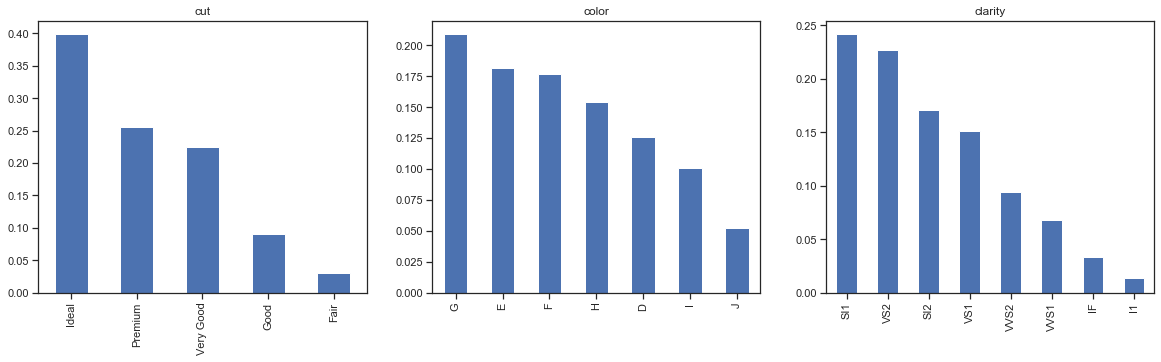

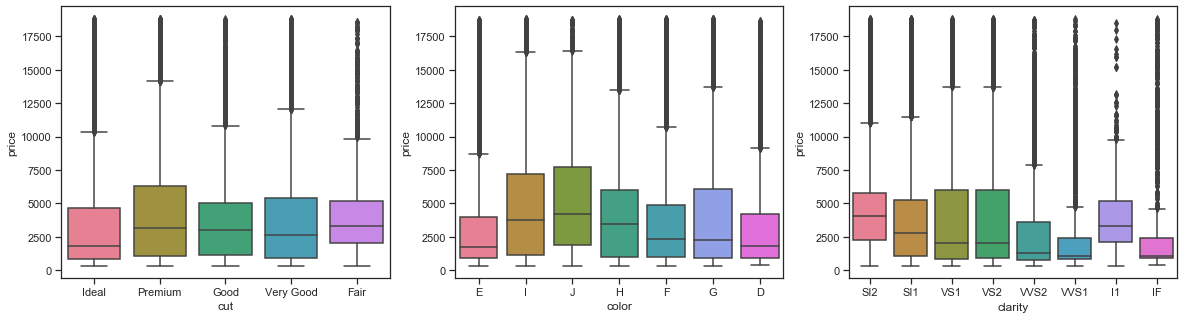

In [7]:
plt.figure(figsize=(20,5))
for i,feature in enumerate(diamond.select_dtypes(include='O').columns.tolist(),1):
    plt.subplot(1,3,i)
    diamond[feature].value_counts(normalize=True).plot.bar()
    plt.title(feature)

plt.figure(figsize=(20,5))
for i,feature in enumerate(diamond.select_dtypes(include='O').columns.tolist(),1):
    plt.subplot(1,3,i)
    sns.boxplot(x=feature,y='price',data=diamond,palette='husl')
plt.show()


 **CUT** 
* Most of the cut present in dataset are of 'Ideal' type with around 40% but median price for them are lowest.
* 'Fair' cut is least found and hence has high price range comparitively.

**COLOR** 
* G,E,F are easily available colors and economical too.
* I,J color type will cost you more bucks :)

**CLARITY** 
* SI1 and VS2 are the most often found clarities in diamonds but need to pay more for SI1 clarity than VS2.

**Note :**
* Price exception are for all cases irrespective of cut,color,clarity.


Combination of Color,Cut,Clarity with median price 


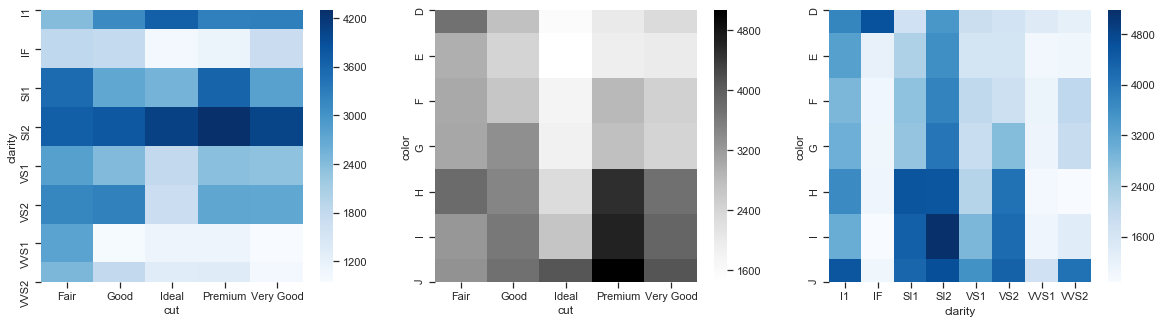

In [8]:
cut_clarity=pd.pivot_table(diamond, values='price', columns='cut', index='clarity', aggfunc='median')
cut_color=pd.pivot_table(diamond, values='price', columns='cut', index='color', aggfunc='median')
clarity_color=pd.pivot_table(diamond, values='price', columns='clarity', index='color', aggfunc='median')

print("Combination of Color,Cut,Clarity with median price ")
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.heatmap(cut_clarity,cmap='Blues')

plt.subplot(132)
sns.heatmap(cut_color,cmap='Greys')

plt.subplot(133)
sns.heatmap(clarity_color,cmap='Blues')
plt.show()

* Combination of Premium cut,SI1 clarity and H,I,J color makes diamond costly.
* IF cut generally doesn't attract more money, but its combination with D color were sold foe higher median price.

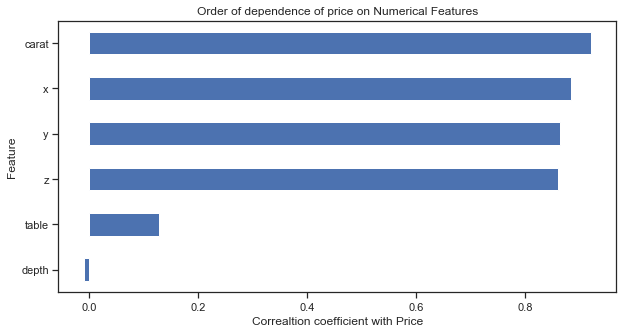

In [9]:
plt.figure(figsize=(10,5))
diamond.corr()['price'].sort_values()[:-1].plot.barh()
plt.title('Order of dependence of price on Numerical Features')
plt.xlabel('Correaltion coefficient with Price')
plt.ylabel('Feature')
plt.show()

* Carat and x,y,z feature are deciding factor for price calculation. 
* Table and depth has very little effect in price of diamond.

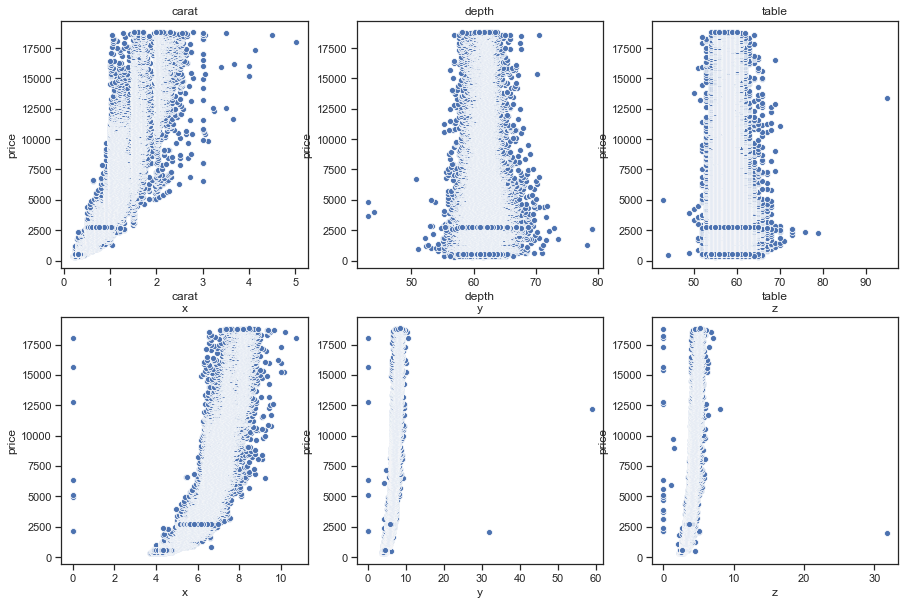

In [10]:
list=['carat', 'depth', 'table', 'x', 'y', 'z']
plt.figure(figsize=(15,10))
for i,feature in enumerate(list,1):
    plt.subplot(2,3,i)
    sns.scatterplot(diamond[feature],diamond['price'])
    plt.title(feature)
plt.show()

* Trend of price with carat,x,y,z can be easily seen from scatterplots.
* While Depth and Table concentrated more in their particular range and have no strong pattern with price.
* Some outliers are clearly visible in scatterplots and need to be treated.

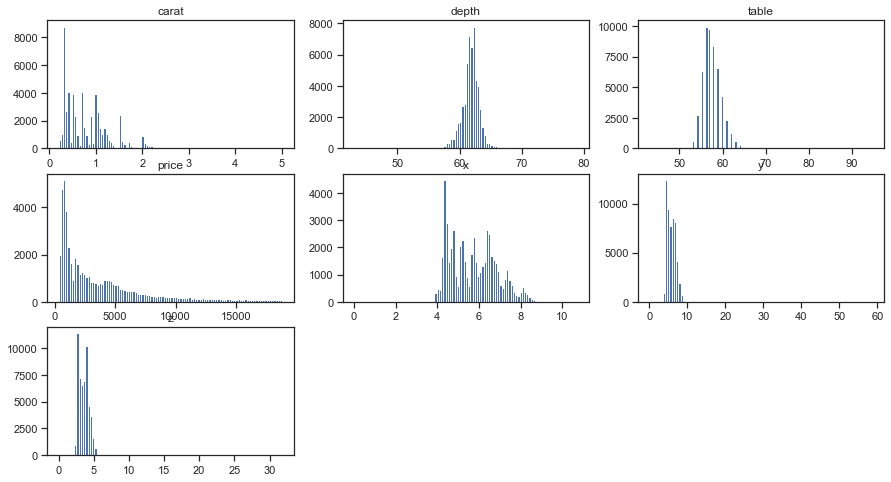

In [11]:
list=['carat', 'depth', 'table', 'x', 'y', 'z']
plt.figure(figsize=(15,8))
for i,feature in enumerate(diamond.select_dtypes(exclude='O').columns.tolist(),1):
    plt.subplot(3,3,i)
    plt.hist(diamond[feature],bins=100)
    plt.title(feature)
plt.show()

* Carat, price and x covers a wide distribution with significant skewness.
* Certainly our numerical features are not normally distributed.

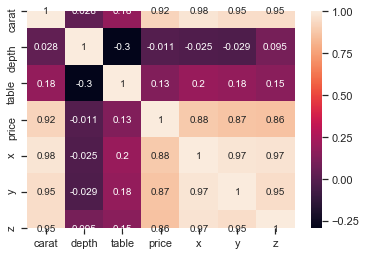

In [12]:
sns.heatmap(diamond.corr(),annot=True)
plt.show()

* Lot of interdependency can be seen between features, as multiple features have high correlation coefficient.

## 1) Raw OLS model


In [13]:
diamond_d=pd.get_dummies(diamond,columns=diamond.select_dtypes(include='O').columns.tolist(),drop_first=True)

X=diamond_d.drop('price',axis=1)
y=diamond.price

Xc = sm.add_constant(X)
lin_reg = sm.OLS(y,Xc).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.688e+04
Date:                Sun, 02 Aug 2020   Prob (F-statistic):               0.00
Time:                        19:25:06   Log-Likelihood:            -4.5573e+05
No. Observations:               53940   AIC:                         9.115e+05
Df Residuals:                   53916   BIC:                         9.117e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2184.4774    408.197      5.352      0.000    1384.409    2984.546
carat          1.126e+04     48.628    231.494      0.000    1.12e+04    1.14e+04
depth           -63.8061      4.535    -14.071      0.000     -72.694     -54.918
table           -26.4741      2.912     -9.092      0.000     -32.181     -20.767
x             -1008.2611     32.898    -30.648      0.000   -1072.741    -943.781
y                 9.6089     19.333      0.497      0.619     -28.284      47.502
z               -50.1189     33.486     -1.497      0.134    -115.752      15.515
cut_Good        579.7514     33.592     17.259      0.000     513.911     645.592
cut_Ideal       832.9118     33.407     24.932      0.000     767.433     898.391
cut_Premium     762.1440     32.228     23.649      0.000     698.978     825.310
cut_Very Good   726.7826     32.241     22.542      0.000     663.591     789.975
color_E        -209.1181     17.893    -11.687      0.000    -244.189    -174.047
color_F        -272.8538     18.093    -15.081      0.000    -308.316    -237.392
color_G        -482.0389     17.716    -27.209      0.000    -516.763    -447.315
color_H        -980.2667     18.836    -52.043      0.000   -1017.185    -943.348
color_I       -1466.2445     21.162    -69.286      0.000   -1507.723   -1424.766
color_J       -2369.3981     26.131    -90.674      0.000   -2420.615   -2318.181
clarity_IF     5345.1022     51.024    104.757      0.000    5245.095    5445.110
clarity_SI1    3665.4721     43.634     84.005      0.000    3579.949    3750.995
clarity_SI2    2702.5863     43.818     61.677      0.000    2616.702    2788.471
clarity_VS1    4578.3979     44.546    102.779      0.000    4491.087    4665.708
clarity_VS2    4267.2236     43.853     97.306      0.000    4181.270    4353.177
clarity_VVS1   5007.7590     47.160    106.187      0.000    4915.326    5100.192
clarity_VVS2   4950.8141     45.855    107.967      0.000    4860.938    5040.690
==============================================================================
Omnibus:                    14433.356   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           565680.446
Skew:                           0.577   Prob(JB):                         0.00
Kurtosis:                      18.823   Cond. No.                     7.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
df_results = pd.DataFrame(columns=['Description','R2','Adjusted_R2','MSE_Model','MSE_Resid'])

description = "Raw OLS"
r2=round(lin_reg.rsquared,3)
adjR2=round(lin_reg.rsquared_adj,3)
msem=round(lin_reg.mse_model,2)
mser=round(lin_reg.mse_resid,2)
df_results = pd.concat([df_results,pd.DataFrame(np.array([description,r2,adjR2,msem,mser]).reshape(1,-1),
            columns=['Description','R2','Adjusted_R2','MSE_Model','MSE_Resid'])], axis=0)

df_results

,Description,R2,Adjusted_R2,MSE_Model,MSE_Resid
0,Raw OLS,0.92,0.92,34331142991.97,1277113.41


## 2) OLS model after log transformation of Price


In [15]:
X
y_log=y.apply(np.log)

Xc = sm.add_constant(X)
lin_reg_log = sm.OLS(y_log,Xc).fit()
lin_reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                 7.597e+04
Date:                Sun, 02 Aug 2020   Prob (F-statistic):               0.00
Time:                        19:25:06   Log-Likelihood:                 17312.
No. Observations:               53940   AIC:                        -3.458e+04
Df Residuals:                   53916   BIC:                        -3.436e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.1460      0.063    -49.606      0.000      -3.270      -3.022
carat            -0.6121      0.008    -81.012      0.000      -0.627      -0.597
depth             0.0522      0.001     74.028      0.000       0.051       0.054
table             0.0090      0.000     19.890      0.000       0.008       0.010
x                 1.1647      0.005    227.871      0.000       1.155       1.175
y                 0.0325      0.003     10.833      0.000       0.027       0.038
z                 0.0427      0.005      8.208      0.000       0.033       0.053
cut_Good          0.0911      0.005     17.459      0.000       0.081       0.101
cut_Ideal         0.1557      0.005     30.007      0.000       0.146       0.166
cut_Premium       0.1102      0.005     22.011      0.000       0.100       0.120
cut_Very Good     0.1244      0.005     24.836      0.000       0.115       0.134
color_E          -0.0581      0.003    -20.913      0.000      -0.064      -0.053
color_F          -0.0895      0.003    -31.823      0.000      -0.095      -0.084
color_G          -0.1574      0.003    -57.192      0.000      -0.163      -0.152
color_H          -0.2583      0.003    -88.257      0.000      -0.264      -0.253
color_I          -0.3847      0.003   -116.996      0.000      -0.391      -0.378
color_J          -0.5244      0.004   -129.166      0.000      -0.532      -0.516
clarity_IF        1.0953      0.008    138.167      0.000       1.080       1.111
clarity_SI1       0.6078      0.007     89.663      0.000       0.595       0.621
clarity_SI2       0.4409      0.007     64.768      0.000       0.428       0.454
clarity_VS1       0.8184      0.007    118.251      0.000       0.805       0.832
clarity_VS2       0.7504      0.007    110.129      0.000       0.737       0.764
clarity_VVS1      1.0047      0.007    137.127      0.000       0.990       1.019
clarity_VVS2      0.9381      0.007    131.674      0.000       0.924       0.952
==============================================================================
Omnibus:                   108822.967   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1412696655.029
Skew:                          16.048   Prob(JB):                         0.00
Kurtosis:                     795.170   Cond. No.                     7.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
description = "OLS + Log Price"
r2=round(lin_reg_log.rsquared,3)
adjR2=round(lin_reg_log.rsquared_adj,3)
msem=round(lin_reg_log.mse_model,2)
mser=round(lin_reg_log.mse_resid,2)
df_results = pd.concat([df_results,pd.DataFrame(np.array([description,r2,adjR2,msem,mser]).reshape(1,-1),
            columns=['Description','R2','Adjusted_R2','MSE_Model','MSE_Resid'])], axis=0)

df_results

,Description,R2,Adjusted_R2,MSE_Model,MSE_Resid
0,Raw OLS,0.92,0.92,34331142991.97,1277113.41
0,OLS + Log Price,0.97,0.97,2342.12,0.03


# Checking the Asumptions of Linear Regression

For Linear Regression, we need to check if the 5 major assumptions hold.

1. No Auto correlation
2. Normality of error terms
3. Linearity of variables 
4. No Heteroscedacity
5. No strong MultiCollinearity


##### Assumption 1- No autocorrelation



Test done : Durbin- Watson Test.

- It's value ranges from 0-4. 
- If the value of Durbin- Watson is Between 0-2, it's known as Positive Autocorrelation.
- If the value ranges from 2-4, it is known as Negative autocorrelation.
- If the value is exactly 2 (generally can take range from 1.5 to 2.5), it means No Autocorrelation .
- For a good linear model, it should have low or no autocorrelation.

we can see here the values of dublin watson test (From OLS summary) : 

1.190 (1st case),

1.533 (2nd case)

Hence no autocorrelation before and after log transformation of price.
    


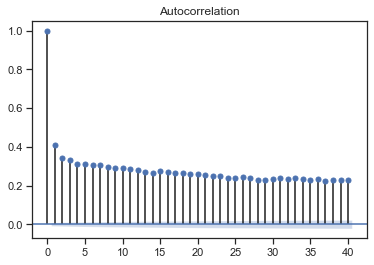

In [17]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)
acf.show()

From the graph below, we can easily see that there is no autocorrelation.

##### Assumption 2- Normality of Residuals

Test done : Jarque Bera test.

* The Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution.
* A large value for the jarque-bera test indicates non normality.
    

In [18]:
from scipy import stats
print('JB value before log Transformation of price :',stats.jarque_bera(lin_reg.resid)[0])
print('JB value  after log Transformation of price :',stats.jarque_bera(lin_reg_log.resid)[0])

JB value before log Transformation of price : 565680.4464890991
JB value  after log Transformation of price : 1412696655.0286944


* The critical chi square value at the 5% level of significance is 5.99. 
* In both case the computed value of the JB statistic is greater than 5.99. 
* Thus we reject the null hypothesis and hence the error terms are not normally distributed.

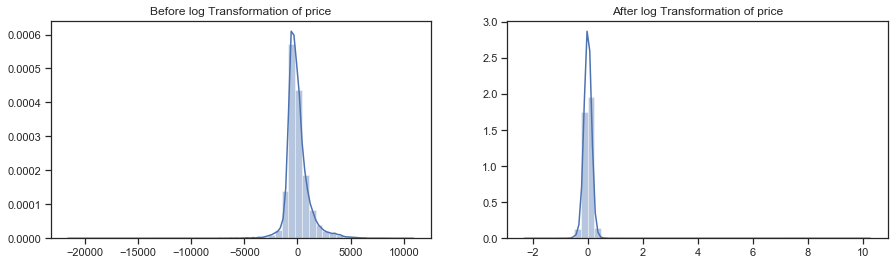

In [19]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title('Before log Transformation of price')
sns.distplot(lin_reg.resid)
plt.subplot(122)
plt.title('After log Transformation of price')
sns.distplot(lin_reg_log.resid)
plt.show()

Residuals have high kurtosis value, which makes it non linear.

##### Asssumption 3 - Linearity of residuals


Test done : Rainbow test 

* It is done to check the linearity of the residuals for a linear regression model.
* Linearity of residuals is preferred.

 $$ H_{0} : Residuals ~are~ linear $$
 $$ H_{1} : Residuals~ are ~not ~linear $$

In [20]:
import statsmodels.api as sm
#checking 50% of fraction of data, since sample of data can be linear.
lstat1,pvalue1=sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)  
lstat2,pvalue2=sm.stats.diagnostic.linear_rainbow(res=lin_reg_log, frac=0.5)  

print('The pvalue before log Transformation of price :',round(pvalue1,3))
print('The pvalue after log Transformation of price :',round(pvalue2,3))

The pvalue before log Transformation of price : 1.0
The pvalue after log Transformation of price : 1.0


* As pvalue > 0.05, We failed to reject H0, Hence residuals are linear.

Probability Plot:
 1)Before
 2)After log Transformation of price


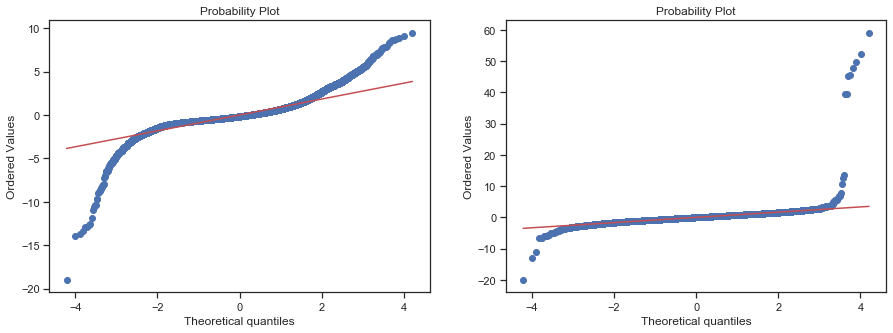

In [21]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot

print('Probability Plot:\n 1)Before\n 2)After log Transformation of price')
plt.figure(figsize=(15,5))
plt.subplot(121)
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)

plt.subplot(122)
st_residual = lin_reg_log.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

* Points are symmetrically distributed around a diagonal line in both case(more after log Transformation of price).
* Hence linearity of residuals can be seen.

In [22]:
print('The mean value of residuals should be zero.\n')
print('The mean value of residuals before log Transformation of price :',lin_reg.resid.mean())
print('The mean value of residuals after log Transformation of price :',lin_reg_log.resid.mean())

The mean value of residuals should be zero.

The mean value of residuals before log Transformation of price : 2.128553562139991e-10
The mean value of residuals after log Transformation of price : -2.951680016048514e-14


* Very much close to zero in both case, So linearity is present.

##### Assumption 4 -  Homoscedasticity_test 

Test done : Goldfeld Test

* If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic and the residuals should be homoscedastic.
* This test is based on the hytpothesis testing where null and alternate hypothesis are:
$$ H_{0} : \sigma_{u_{i}}~is~constant~across~the~range~of~data $$

$$ H_{a} : \sigma_{u_{i}}~is~not~constant~across~the~range~of~data $$




In [23]:
import statsmodels.stats.api as sms

pvalue1 = sms.het_goldfeldquandt(lin_reg.resid, lin_reg.model.exog)[1]
pvalue2 = sms.het_goldfeldquandt(lin_reg_log.resid, lin_reg_log.model.exog)[1]

print('The pvalue before log Transformation of price :',round(pvalue1,3))
print('The pvalue after log Transformation of price :',round(pvalue2,3))

The pvalue before log Transformation of price : 1.0
The pvalue after log Transformation of price : 1.0


Here, p value > 0.05 so we failed to reject null hypothesis, it is homoscedasticity distribution.

##### Assumption 5- NO  MULTI COLLINEARITY

* As, we can see from the second warning of OLS model itself that Multicollinearity is present in the dataset.
* It can also be stated by noting the high conditional number.


In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
vif,22.439582,1.782401,1.787765,57.518327,20.59216,23.585582,3.940574,11.308678,8.348051,7.631051,...,1.951752,1.710211,1.423173,3.527903,14.759699,11.466553,10.772677,14.263817,5.933726,7.557383


* The interpretation of VIF is as follows: the square root of a given variable’s VIF shows how much larger the standard error is, compared with what it would be if that predictor were uncorrelated with the other features in the model. If no features are correlated, then all values for VIF will be 1.
* So, multicollinearity exists here as vif values are high.

##  Dropping feature with highest VIF value

In [25]:
diamond_d2=diamond_d.drop('x',axis=1)

X2=diamond_d2.drop('price',axis=1)
y=diamond.price

Xc2 = sm.add_constant(X2)
lin_reg2 = sm.OLS(y,Xc2).fit()

description = "OLS + without X feature "
r2=round(lin_reg2.rsquared,3)
adjR2=round(lin_reg2.rsquared_adj,3)
msem=round(lin_reg2.mse_model,2)
mser=round(lin_reg2.mse_resid,2)
df_results = pd.concat([df_results,pd.DataFrame(np.array([description,r2,adjR2,msem,mser]).reshape(1,-1),
            columns=['Description','R2','Adjusted_R2','MSE_Model','MSE_Resid'])], axis=0)

df_results

,Description,R2,Adjusted_R2,MSE_Model,MSE_Resid
0,Raw OLS,0.92,0.92,34331142991.97,1277113.41
0,OLS + Log Price,0.97,0.97,2342.12,0.03
0,OLS + without X feature,0.918,0.918,35837121379.55,1299339.08


## OLS + without X feature + Log Price

In [26]:
X2
y_log

Xc3 = sm.add_constant(X2)
lin_reg3 = sm.OLS(y_log,Xc3).fit()

description = "OLS + without X feature + Log Price"
r2=round(lin_reg3.rsquared,3)
adjR2=round(lin_reg3.rsquared_adj,3)
msem=round(lin_reg3.mse_model,2)
mser=round(lin_reg3.mse_resid,2)
df_results = pd.concat([df_results,pd.DataFrame(np.array([description,r2,adjR2,msem,mser]).reshape(1,-1),
            columns=['Description','R2','Adjusted_R2','MSE_Model','MSE_Resid'])], axis=0)

df_results

,Description,R2,Adjusted_R2,MSE_Model,MSE_Resid
0,Raw OLS,0.92,0.92,34331142991.97,1277113.41
0,OLS + Log Price,0.97,0.97,2342.12,0.03
0,OLS + without X feature,0.918,0.918,35837121379.55,1299339.08
0,OLS + without X feature + Log Price,0.941,0.941,2375.82,0.06


Lets check VIF again.

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('Display.max_columns',None)
vif = [variance_inflation_factor(Xc3.values, i) for i in range(Xc3.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X2.columns).T

,carat,depth,table,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
vif,14.806351,1.573008,1.78764,15.776727,16.603617,3.93694,11.298146,8.346208,7.613782,2.009935,2.012246,2.193308,1.951752,1.709857,1.422394,3.524792,14.756888,11.465374,10.772602,14.263755,5.928825,7.555289


Still multicolinearity can be seen in some features, so we will be dropping those feature and will check performance of model again.

## OLS + No multicolinear Feature

In [28]:
diamond_d4=diamond_d.drop(['z','cut_Ideal','clarity_SI1'],axis=1)

X4=diamond_d4.drop('price',axis=1)
y=diamond.price

Xc4 = sm.add_constant(X4)
lin_reg4 = sm.OLS(y,Xc4).fit()

description = "OLS + No multicolinear Feature "
r2=round(lin_reg4.rsquared,3)
adjR2=round(lin_reg4.rsquared_adj,3)
msem=round(lin_reg4.mse_model,2)
mser=round(lin_reg4.mse_resid,2)
df_results = pd.concat([df_results,pd.DataFrame(np.array([description,r2,adjR2,msem,mser]).reshape(1,-1),
            columns=['Description','R2','Adjusted_R2','MSE_Model','MSE_Resid'])], axis=0)

df_results

,Description,R2,Adjusted_R2,MSE_Model,MSE_Resid
0,Raw OLS,0.92,0.92,34331142991.97,1277113.41
0,OLS + Log Price,0.97,0.97,2342.12,0.03
0,OLS + without X feature,0.918,0.918,35837121379.55,1299339.08
0,OLS + without X feature + Log Price,0.941,0.941,2375.82,0.06
0,OLS + No multicolinear Feature,0.907,0.907,38945275335.97,1475688.14


## OLS + No multicolinear Feature + Log Price

In [29]:
X4
y_log

Xc5 = sm.add_constant(X4)
lin_reg5 = sm.OLS(y_log,Xc5).fit()

description = "OLS + No multicolinear Feature + Log Price"
r2=round(lin_reg5.rsquared,3)
adjR2=round(lin_reg5.rsquared_adj,3)
msem=round(lin_reg5.mse_model,2)
mser=round(lin_reg5.mse_resid,2)
df_results = pd.concat([df_results,pd.DataFrame(np.array([description,r2,adjR2,msem,mser]).reshape(1,-1),
            columns=['Description','R2','Adjusted_R2','MSE_Model','MSE_Resid'])], axis=0)

df_results

,Description,R2,Adjusted_R2,MSE_Model,MSE_Resid
0,Raw OLS,0.92,0.92,34331142991.97,1277113.41
0,OLS + Log Price,0.97,0.97,2342.12,0.03
0,OLS + without X feature,0.918,0.918,35837121379.55,1299339.08
0,OLS + without X feature + Log Price,0.941,0.941,2375.82,0.06
0,OLS + No multicolinear Feature,0.907,0.907,38945275335.97,1475688.14
0,OLS + No multicolinear Feature + Log Price,0.965,0.965,2678.15,0.04


* From above results we can infer that taking log transformation on price feature is giving better results in all cases.
* R2 and AdjustedR2 values are almost similar.
* OLS model with Log of price can be considered for further studies as it is giving best result in predicting price of diamonds.


**Do Upvote if you liked my work.**

**Happy learning!!**